In [7]:
#==============================================================================
# 4.5资本资产定价模型与证券市场线
#==============================================================================
#Python计算但资产的风险情况
import os
import pandas as pd
indexcd = pd.read_csv("TRD_Index.csv",index_col = 'Trddt')

In [8]:
indexcd.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014/1/3,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014/1/6,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014/1/7,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014/1/8,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454


In [9]:
indexcd['Indexcd'].value_counts()

399005    311
399001    311
903       311
3         311
399108    311
399004    311
902       311
10        311
2         311
399107    311
1         311
399106    311
399903    311
300       311
20        311
Name: Indexcd, dtype: int64

In [11]:
#获取中证流通指数的收益率
mktcd = indexcd[indexcd.Indexcd ==902]
mktcd.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,902,4,3014.540,3029.042,3006.146,3028.749,0.002563
2014/1/3,902,5,3019.490,3022.980,2988.794,3001.462,-0.009009
2014/1/6,902,1,2995.242,2995.242,2922.058,2927.477,-0.024650
2014/1/7,902,2,2911.057,2943.681,2905.071,2938.602,0.003800
2014/1/8,902,3,2942.276,2972.339,2933.970,2950.733,0.004128


In [12]:
mktret = pd.Series(mktcd.Retindex.values,index = pd.to_datetime(mktcd.index))
mktret.name= 'market'

mktret = mktret['2014-01-01':'2014']
mktret.head()

Trddt
2014-01-02    0.002563
2014-01-03   -0.009009
2014-01-06   -0.024650
2014-01-07    0.003800
2014-01-08    0.004128
Name: market, dtype: float64

In [13]:
#获取新安股份的数据
xin_an = pd.read_csv('xin_an.csv',index_col='Date')
xin_an.index = pd.to_datetime(xin_an.index)
xin_an.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-01,1,10.59,10.59,10.59,10.59,0
2014-01-02,2,10.62,10.99,10.58,10.96,10984100
2014-01-03,3,10.89,11.04,10.71,10.85,7629900
2014-01-06,4,10.83,10.83,10.00,10.10,14364700
2014-01-07,5,10.05,10.22,9.95,10.11,5219100


In [14]:
#剔除交易量等于0的数据
xin_an = xin_an[xin_an.Volume !=0]
xin_an['return'] = (xin_an['Close'] - xin_an['Close'].shift(1))/xin_an['Close'].shift(1)
#保留收益率变量
xin_an = xin_an['return']
xin_an.dropna(inplace=True)

In [15]:
#将新安股份收益率和市场收益率数据进行合并，计算风险溢价
Ret = pd.merge(pd.DataFrame(mktret),pd.DataFrame(xin_an),left_index=True,right_index=True,
               how ='inner')
#计算无风险收益率
rf = 1.036**(1/365) -1
Ret['risk_premium'] = Ret['market'] - rf

Text(0.5, 1.0, 'xinan return VS market return')

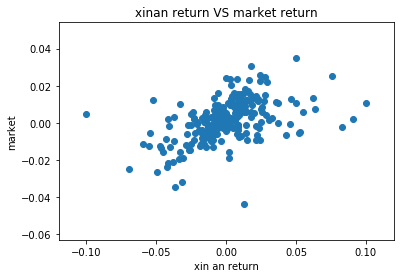

In [17]:
#绘制新安股份和中证指数的散点图
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Ret['return'],Ret['market'])
plt.xlabel('xin an return'); plt.ylabel('market')
plt.title('xinan return VS market return')

In [18]:
#拟合曲线，找到beta
#提出X和Y
import  statsmodels.api as sm 
Ret['constant'] = 1 #增加截距项
X  = Ret[['constant','risk_premium']]
Y = Ret['return']

model= sm.OLS(Y,X)
result =model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     76.50
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           3.86e-16
Time:                        11:15:58   Log-Likelihood:                 578.51
No. Observations:                 243   AIC:                            -1153.
Df Residuals:                     241   BIC:                            -1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant        -0.0016      0.001     -1.087   

In [19]:
#==============================================================================
# 4.7 Fama-French三因子模型
#==============================================================================
# 华夏银行案例
import os
import pandas as pd
#%%
stock=pd.read_table('stock.txt',sep='\t',index_col='Trddt')

HXBank = stock[stock.Stkcd==600015] #获取华夏银行数据
HXBank.head()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014/1/2,600015,8.51,8.51,8.24,8.30,37610633,312566002.0,53847800.53,73908541.12,-0.031505,-0.031505,21.201796,16.832287,1,2013/7/24,1
2014/1/3,600015,8.25,8.25,8.00,8.06,29878459,241173977.0,52290755.70,71771426.68,-0.028916,-0.028916,20.588732,16.345570,1,2013/7/24,1
2014/1/6,600015,8.10,8.15,7.81,7.87,34358547,272247252.0,51058095.20,70079544.42,-0.023573,-0.023573,20.103390,15.960253,1,2013/7/24,1
2014/1/7,600015,7.82,7.91,7.74,7.84,21266442,166163363.0,50863464.60,69812405.11,-0.003812,-0.003812,20.026757,15.899413,1,2013/7/24,1
2014/1/8,600015,7.87,8.04,7.81,8.01,29337361,233617796.0,51966371.36,71326194.51,0.021684,0.021684,20.461011,16.244171,1,2013/7/24,1


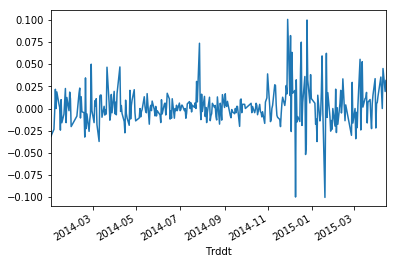

In [20]:
HXBank.index=pd.to_datetime(HXBank.index)
HXRet=HXBank.Dretwd
HXRet.name='HXRet'
HXRet.plot()

In [21]:
#读取三因子数据
ThreeFactors=pd.read_table('ThreeFactors.txt',sep='\t',
                           index_col='TradingDate')
#将索引转化为时间格式
ThreeFactors.index=pd.to_datetime(ThreeFactors.index)
ThrFac=ThreeFactors['2014-01-02':] #截取2014年1月2号以后的数据
ThrFac=ThrFac.iloc[:,[2,4,6]] #提取对应的3个因子
#合并股票收益率和3因子的相关数据
HXThrFac=pd.merge(pd.DataFrame(HXRet),pd.DataFrame(ThrFac),
                  left_index=True,right_index=True)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


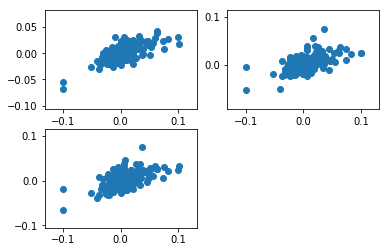

In [22]:
#作图
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.scatter(HXThrFac.HXRet,HXThrFac.RiskPremium2)
plt.subplot(2,2,2)
plt.scatter(HXThrFac.HXRet,HXThrFac.SMB2)
plt.subplot(2,2,3)
plt.scatter(HXThrFac.HXRet,HXThrFac.HML2)
plt.show()

In [23]:
#回归
import statsmodels.api as sm
regThrFac=sm.OLS(HXThrFac.HXRet,sm.add_constant(HXThrFac.iloc[:,1:4]))
result=regThrFac.fit()
result.summary()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HXRet   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           1.43e-78
Time:                        16:11:04   Log-Likelihood:                 929.94
No. Observations:                 310   AIC:                            -1852.
Df Residuals:                     306   BIC:                            -1837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.001      0.444      0.657      -0.001       0.002
RiskPremium2     1.0459      0.057     18.438      0.000       0.934       1.158
SMB2             0.1899      0.104      1.820      0.070      -0.015       0.395
HML2             0.5659      0.091      6.236      0.000       0.387       0.744
==============================================================================
Omnibus:                       56.500   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.229
Skew:                           0.637   Prob(JB):                     2.09e-59
Kurtosis:                       7.393   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result.params

const           0.000313
RiskPremium2    1.045921
SMB2            0.189923
HML2            0.565870
dtype: float64